## 创建项目环境和基本依赖

### 一、环境配置
1. 准备下面环境的API KEY
```bash
TAVILY_API_KEY= 
DOUBAI_API_KEY=
OPANAI_API_KEY=
FIRECRAWL_API_KEY=
```

2. 使用uv准备工程环境，和所需要的包文件。在命令行中执行下面命令
```bash
#!/bin/bash
uv init deep-research-quickstart
cd deep-research-quickstart
mkdir src
uv add jinja2 firecrawl-py socksio
uv add langchain langchain-openai langchain_tavily
uv add langgraph langgraph-supervisor
```

### 一、模型

In [1]:
import os
from src.models.chat_model import chat_model_doubao

print(chat_model_doubao.invoke("你好，豆包").content)

你好呀！有什么问题我都可以帮你解答，尽管跟我说。 


In [2]:
import os
from src.models.chat_model import chat_model

print(chat_model.invoke("你好").content)

你好！有什么我可以帮助你的吗？


## 二、工具

In [3]:
# 导入网页爬取工具
from src.tools.web_crawl import web_crawl
import os

# 检查 FIRECRAWL_API_KEY 环境变量
if not os.getenv("FIRECRAWL_API_KEY"):
    print("⚠️  警告: 未设置 FIRECRAWL_API_KEY 环境变量")
    print("请设置环境变量: export FIRECRAWL_API_KEY='your_api_key'")
else:
    print("✅ FIRECRAWL_API_KEY 已配置")

# 基本爬取示例
try:
    # 爬取一个示例网页
    url = "https://docs.byteplus.com/en/docs/byteplus-media-live/docs-changelog"
    print(f"\n正在爬取: {url}")
    
    content = web_crawl.invoke(url)
    
    print(f"\n爬取成功! 内容预览:")
    print("=" * 50)
    # 只显示前500个字符
    print(content[:500] + "...")
    
except Exception as e:
    print(f"爬取失败: {e}")
    print("请确保已设置正确的 FIRECRAWL_API_KEY")


✅ FIRECRAWL_API_KEY 已配置

正在爬取: https://docs.byteplus.com/en/docs/byteplus-media-live/docs-changelog

爬取成功! 内容预览:
DeepSeek-R1-0528 is now on BytePlus! Sign up for 500k free tokens, refer friends and earn up to $45!

[Get free tokens](https://www.byteplus.com/en/experience/modelark)

DeepSeek-R1-0528 is now on BytePlus! Sign up for 500k free tokens, refer friends and earn up to $45!

[Get free tokens](https://www.byteplus.com/en/experience/modelark)

[![BytePlus](https://assets.byteplus.com/obj/byteplus-assets/navigation/byteplus-logo.svg)](https://www.byteplus.com/en)

[ModelArk](https://www.byteplus.com/en...


使用chatmodel结合爬虫工具

In [ ]:
# 高级示例：爬取网页内容并用AI分析
from src.models.chat_model import chat_model
from langchain.schema import SystemMessage, HumanMessage

def analyze_webpage(url, question):
    """爬取网页并用AI分析内容"""
    try:
        print(f"正在爬取: {url}")
        
        # 爬取网页内容
        content = web_crawl.invoke(url)
        
        if not content:
            return "爬取失败或内容为空"
            
        print(f"爬取成功，内容长度: {len(content)} 字符")
        
        # 使用AI分析内容
        response = chat_model.invoke([
            SystemMessage(content="""你是一个视频云产品专家。请基于提供的网页内容，回答相关问题。
            要求：
            1. 仔细阅读网页内容
            2. 针对用户问题给出准确回答
            3. 如果内容不足以回答问题，请明确说明
            4. 用中文回答"""),
            HumanMessage(content=f"网页内容:\n{content[:3000]}\n\n用户问题: {question}")
        ])
        
        return response.content
        
    except Exception as e:
        return f"分析失败: {e}"

# 示例使用
if os.getenv("FIRECRAWL_API_KEY") and os.getenv("DOUBAO_API_KEY"):
    # 分析Python官网
    result = analyze_webpage(
        "https://docs.byteplus.com/en/docs/byteplus-media-live/docs-changelog", 
        "把过去发布的特征整理成mardown格式；"
    )
    print("\nAI分析结果:")
    print("=" * 50)
    print(result)
else:
    print("需要设置 FIRECRAWL_API_KEY 和 DOUBAO_API_KEY 环境变量才能运行此示例")


# 三、单智能体Agent

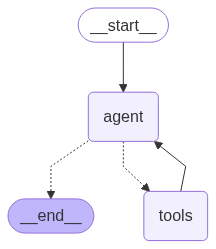

================================ Human Message =================================

2025年NBA总决赛谁赢了？
================================== Ai Message ==================================
Name: researcher
Tool Calls:
  web_search (call_i6ZwuF4TGJTqPjKgX02sJKWL)
 Call ID: call_i6ZwuF4TGJTqPjKgX02sJKWL
  Args:
    query: 2025 NBA Finals winner
================================= Tool Message =================================
Name: web_search

{'query': '2025 NBA Finals winner', 'follow_up_questions': None, 'answer': None, 'images': [], 'results': [{'title': 'Who Won the NBA Finals 2025? Check the NBA Championship Winner Here', 'url': 'https://www.jagranjosh.com/us/trending/who-won-the-nba-finals-2025-1860000073', 'content': "Following an intense series against the Indiana Pacers in the 2025 NBA Finals, the Oklahoma City Thunder made their way to their first-ever NBA Championship. Image 4: The Oklahoma City Thunder won the NBA Finals 2025, bringing their city the first ever NBA Championship Title. T

In [4]:
import uuid
import os
from typing import Optional
from langgraph.graph.graph import CompiledGraph
from src.agents.researcher import researcher


def run_agent(agent: CompiledGraph, message: str):
    result = agent.stream(
        {"messages": [{"role": "user", "content": message}]},
        stream_mode="values",
        config={"thread_id": uuid.uuid4()},
    )
    for chunk in result:
        messages = chunk["messages"]
        last_message = messages[-1]
        last_message.pretty_print()



from IPython.display import Image, display

png_data = researcher.get_graph()

png_data = researcher.get_graph().draw_mermaid_png() 
display(Image(png_data))


run_agent(researcher, "2025年NBA总决赛谁赢了？")